## Compute average distance between points of a circle

2025-03-16

Circle radius is the only independent variable.

In [28]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
# real mean distance of two random points in a circle
2 * np.sqrt(2) / np.pi

0.9003163161571062

In [4]:
# mean distance of two random points on a square
(np.sqrt(2) + 2 + 5 * np.log(1 + np.sqrt(2))) / 15

0.5214054331647207

In [15]:
def compute_avg_distance(R, n_points, seed=42):
    np.random.seed(seed)

    n_hit = 0
    ds = []

    for pt in range(n_points):
        x1, y1 = (np.random.rand(2) - 0.5) * 2 * R
        x2, y2 = (np.random.rand(2) - 0.5) * 2 * R
        if norm([x1, y1]) <= R and norm([x2, y2]) <= R:
            n_hit += 1
            d = np.sqrt((x2-x1)**2 + (y2-y1)**2)
            ds.append(d)

    return np.average(ds), np.std(ds), n_hit

In [ ]:
res = compute_avg_distance(1, int(1e4))
res

In [20]:
%%time

buf = []

for seed in range(30, 40):
    res = compute_avg_distance(1.0, int(1e5), seed=seed)
    buf.append(res)
    print(res)

(0.9020958370539102, 0.424799478930182, 61743)
(0.9058283645361459, 0.4245361635242395, 61862)
(0.9050701557979945, 0.4249244682041191, 61778)
(0.9066574556338943, 0.42456266543504695, 61491)
(0.9038153519503354, 0.42470869348522705, 61787)
(0.9017949791775707, 0.4242193556980375, 61878)
(0.9043501957451255, 0.42599715757648776, 61456)
(0.9054457438265464, 0.4245306404919941, 61702)
(0.9040954149017132, 0.4256319961180819, 61706)
(0.9081536316594567, 0.4257992585133758, 61549)
CPU times: user 19.3 s, sys: 285 ms, total: 19.6 s
Wall time: 22.9 s


In [24]:
df_res = pd.DataFrame(buf, columns=['mean', 'std', 'n_acc'])
df_res

,mean,std,n_acc
0,0.902096,0.424799,61743
1,0.905828,0.424536,61862
2,0.905070,0.424924,61778
3,0.906657,0.424563,61491
4,0.903815,0.424709,61787
5,0.901795,0.424219,61878
6,0.904350,0.425997,61456
7,0.905446,0.424531,61702
8,0.904095,0.425632,61706
9,0.908154,0.425799,61549


In [36]:
df_res[['mean', 'std']].mean()

mean    0.904731
std     0.424971
dtype: float64

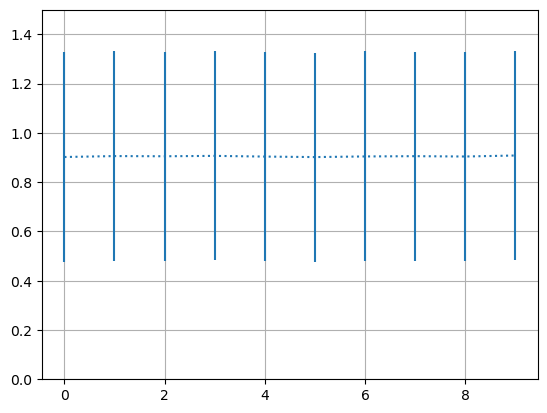

In [34]:
plt.errorbar(x=df_res.index, y=df_res['mean'], yerr=df_res['std'], linestyle='dotted')
plt.ylim([0, 1.5])
plt.grid()